#### Importing Data

In [1]:
import kagglehub
import shutil
import os

# Specify the save path
save_path = "C:/Users/Jerico/Documents/gitRepositories/Dirty-E-Commerce-Data-Project/source_files"

# Download latest version
path = kagglehub.dataset_download("oleksiimartusiuk/e-commerce-data-shein")

print("Path to dataset files:", path)

# Check if folder exists
try:
    if os.path.exists(save_path):
        # Remove the existing directory
        shutil.rmtree(save_path)
        print(f"Existing files at {save_path} removed.")

    # Move the downloaded files to the specified path
    if os.path.exists(path):
        shutil.move(path, save_path)
        print(f"Dataset moved to {save_path}")
    else:
        print("Download path not found!")
except FileNotFoundError as e:
    print(f"Error: The specified file or directory was not found: {e}")

c:\Users\Jerico\Documents\gitRepositories\Dirty-E-Commerce-Data-Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.44M/3.44M [00:01<00:00, 3.10MB/s]

Extracting files...
Path to dataset files: C:\Users\Jerico\.cache\kagglehub\datasets\oleksiimartusiuk\e-commerce-data-shein\versions\4
Existing files at C:/Users/Jerico/Documents/gitRepositories/Dirty-E-Commerce-Data-Project/source_files removed.
Dataset moved to C:/Users/Jerico/Documents/gitRepositories/Dirty-E-Commerce-Data-Project/source_files


### Exploratory Data Analysis

In [2]:
import pandas as pd

csv_file1 = "./source_files/us-shein-appliances-3987.csv"

shen_appliances = pd.read_csv(csv_file1)

print(shen_appliances.head(1))

                              goods-title-link--jump  \
0  1pc Rechargeable Deep Tissue Muscle Handheld M...   

                         goods-title-link--jump href       rank-title  \
0  https://us.shein.com/1pc-Rechargeable-Deep-Tis...  #1 Best Sellers   

        rank-sub  price discount selling_proposition goods-title-link  
0  in Give Gifts  $2.03     -22%                 NaN              NaN  


In [3]:
csv_file2 = "./source_files/us-shein-automotive-4110.csv"
shein_automotive = pd.read_csv(csv_file2)

print(shein_automotive.head(1))

                              goods-title-link--jump  \
0  1pc/2PCS Car Cup Coaster, Bling Cup Holder Ins...   

                         goods-title-link--jump href  price discount  \
0  https://us.shein.com/1pc-2PCS-Car-Cup-Coaster-...  $0.68     -60%   

  selling_proposition goods-title-link  
0                 NaN              NaN  


In [4]:
# Load all the csv files with their filename as the dataframe name
def load_all_csv_files(folder_path):
    dataframes = {}
    # Get only the csv files
    for filename in os.listdir(folder_path):
        if filename.endswith("csv"):
            file_path = os.path.join(folder_path, filename)

            # filename as dataframe name
            df_name = filename.replace(".csv", "")

            # Read the csv
            dataframes[df_name] = pd.read_csv(file_path)

            # Print the first row in the dataframe to confirm
            print(f"Data from {df_name}: \n", dataframes[df_name].head(1))

    return dataframes


# Enter folder path
folder_path = "./source_files"

# Use load_all_csv_files
dataframes = load_all_csv_files(folder_path)

Data from us-shein-appliances-3987: 
                               goods-title-link--jump  \
0  1pc Rechargeable Deep Tissue Muscle Handheld M...   

                         goods-title-link--jump href       rank-title  \
0  https://us.shein.com/1pc-Rechargeable-Deep-Tis...  #1 Best Sellers   

        rank-sub  price discount selling_proposition goods-title-link  
0  in Give Gifts  $2.03     -22%                 NaN              NaN  
Data from us-shein-automotive-4110: 
                               goods-title-link--jump  \
0  1pc/2PCS Car Cup Coaster, Bling Cup Holder Ins...   

                         goods-title-link--jump href  price discount  \
0  https://us.shein.com/1pc-2PCS-Car-Cup-Coaster-...  $0.68     -60%   

  selling_proposition goods-title-link  
0                 NaN              NaN  
Data from us-shein-baby_and_maternity-4433: 
                               goods-title-link--jump  \
0  Baby Boys' Dinosaur Printed Vest And Letter Pr...   

                     

### Data Cleaning

In [5]:
dataframe_names = list(dataframes.keys())

print(dataframe_names)

['us-shein-appliances-3987', 'us-shein-automotive-4110', 'us-shein-baby_and_maternity-4433', 'us-shein-bags_and_luggage-4299', 'us-shein-beauty_and_health-4267', 'us-shein-curve-2849', 'us-shein-electronics-4395', 'us-shein-home_and_kitchen-3719', 'us-shein-home_textile-3883', 'us-shein-jewelry_and_accessories-3548', 'us-shein-kids-4314', 'us-shein-mens_clothes-1891', 'us-shein-office_and_school_supplies-4233', 'us-shein-pet_supplies-4083', 'us-shein-shoes-4381', 'us-shein-sports_and_outdoors-3853', 'us-shein-swimwear-3761', 'us-shein-tools_and_home_improvement-3903', 'us-shein-toys_and_games-3577', 'us-shein-underwear_and_sleepwear-4019', 'us-shein-womens_clothing-4620']


In [6]:
excluded_columns = [
    "goods-title-link--jump href",
    "goods-title-link--jump",
    "rank-title",
    "rank-sub",
    "color-count",
    "blackfridaybelts-bg src",
    "blackfridaybelts-content",
    "product-locatelabels-img src",
]

In [7]:
# Function to remove the excluded columns for each dataframe
def remove_columns(df: pd.DataFrame, excluded_columns: list) -> pd.DataFrame:
    # Get all the columns:
    for column in df.columns:
        # Get the column names
        if column in excluded_columns:
            # Drop the column
            df.drop(column, axis=1, inplace=True)
            print(f"Column '{column}' dropped.")

    return df

In [8]:
# iterate on all of the dataframes in the dictionary
for df_name in dataframes:
    df = dataframes[df_name]
    print(f"Cleaning {df_name}")

    # Use function to remove excluded columns
    df_cleaned = remove_columns(df, excluded_columns)

    # Update the dataframe with the cleaned version
    dataframes[df_name] = df_cleaned

for df_name in dataframes:
    print(f"\n DataFrame {df_name}")
    print(dataframes[df_name].head())

Cleaning us-shein-appliances-3987
Column 'goods-title-link--jump' dropped.
Column 'goods-title-link--jump href' dropped.
Column 'rank-title' dropped.
Column 'rank-sub' dropped.
Cleaning us-shein-automotive-4110
Column 'goods-title-link--jump' dropped.
Column 'goods-title-link--jump href' dropped.
Cleaning us-shein-baby_and_maternity-4433
Column 'goods-title-link--jump' dropped.
Column 'goods-title-link--jump href' dropped.
Column 'color-count' dropped.
Cleaning us-shein-bags_and_luggage-4299
Column 'color-count' dropped.
Column 'goods-title-link--jump' dropped.
Column 'goods-title-link--jump href' dropped.
Column 'rank-title' dropped.
Column 'rank-sub' dropped.
Cleaning us-shein-beauty_and_health-4267
Column 'goods-title-link--jump' dropped.
Column 'goods-title-link--jump href' dropped.
Column 'color-count' dropped.
Column 'rank-title' dropped.
Column 'rank-sub' dropped.
Cleaning us-shein-curve-2849
Column 'color-count' dropped.
Column 'goods-title-link--jump' dropped.
Column 'goods-ti

In [9]:
print(dataframes["us-shein-underwear_and_sleepwear-4019"])

     selling_proposition   price discount  \
0     200+ sold recently   $3.39     -70%   
1                    NaN  $20.99      -7%   
2                    NaN  $10.29      NaN   
3      80+ sold recently   $3.74     -65%   
4                    NaN  $13.79      NaN   
...                  ...     ...      ...   
4013                 NaN   $1.91     -40%   
4014  900+ sold recently   $3.99      -7%   
4015  300+ sold recently   $4.89      -6%   
4016  600+ sold recently   $5.99     -20%   
4017  200+ sold recently   $6.59     -15%   

                                       goods-title-link  
0                                                   NaN  
1                                                   NaN  
2                                                   NaN  
3                                                   NaN  
4                                                   NaN  
...                                                 ...  
4013  Men's Bodysuit Lingerie Muscle Men Temptation .

#### Combine all of the dataframes

In [10]:
combined_df = pd.concat(dataframes.values(), ignore_index=True)

In [11]:
print(combined_df.head(5))

    price discount  selling_proposition goods-title-link
0   $2.03     -22%                  NaN              NaN
1   $6.48     -20%                  NaN              NaN
2   $1.80      NaN   400+ sold recently              NaN
3   $0.88     -72%  5.6k+ sold recently              NaN
4  $12.06     -40%                  NaN              NaN


In [12]:
before_cleaning = combined_df
print(before_cleaning.count())

price                  82103
discount               54977
selling_proposition    54364
goods-title-link       81427
dtype: int64


#### Removing Null Values with

In [13]:
after_cleaning = before_cleaning.dropna(how="all")

In [14]:
print(f"Removed columns\n {before_cleaning.count() - after_cleaning.count()}")

Removed columns
 price                  0
discount               0
selling_proposition    0
goods-title-link       0
dtype: int64


In [15]:
print(f"After Cleaning\n {after_cleaning.count()} Data Ponits")

After Cleaning
 price                  82103
discount               54977
selling_proposition    54364
goods-title-link       81427
dtype: int64 Data Ponits


#### Not removing duplicates since they represent a valid transation

#### Repalcing Null values on columns with 0

In [16]:
after_cleaning = after_cleaning.fillna(0)

#### Fixing Price formatting

In [17]:
import re

# Define a pattern to check for different formats (currency symbols, commas, etc.)
price_pattern = r"(\$|€|£|\d{1,3}(?:,\d{3})*)(\.\d{2})?"

formatted_prices = after_cleaning["price"].apply(
    lambda x: bool(re.match(price_pattern, str(x)))
)
print(formatted_prices.value_counts())

price
True    82103
Name: count, dtype: int64


In [18]:
# Check if the price column contains the '$' symbol
dollar_prices = after_cleaning["price"].str.contains(r"\$", regex=True)

# Display the rows where the 'price' contains '$'
print(after_cleaning[dollar_prices])

        price discount  selling_proposition  \
0       $2.03     -22%                    0   
1       $6.48     -20%                    0   
2       $1.80        0   400+ sold recently   
3       $0.88     -72%  5.6k+ sold recently   
4      $12.06     -40%                    0   
...       ...      ...                  ...   
82100  $35.69        0                    0   
82101  $42.49        0    10+ sold recently   
82102  $49.29        0   200+ sold recently   
82103   $9.78      -5%                    0   
82104  $21.19        0                    0   

                                        goods-title-link  
0                                                      0  
1                                                      0  
2                                                      0  
3                                                      0  
4                                                      0  
...                                                  ...  
82100  Colorful Flower

In [19]:
# Remove the dollar sign from the 'price' column
after_cleaning["price"] = after_cleaning["price"].str.replace(r"\$", "", regex=True)

# Convert the 'price' column to float
after_cleaning["price"] = pd.to_numeric(after_cleaning["price"], errors="coerce")

# Display the updated dataframe
print(after_cleaning.head())

   price discount  selling_proposition goods-title-link
0   2.03     -22%                    0                0
1   6.48     -20%                    0                0
2   1.80        0   400+ sold recently                0
3   0.88     -72%  5.6k+ sold recently                0
4  12.06     -40%                    0                0


In [20]:
after_cleaning

,price,discount,selling_proposition,goods-title-link
0,2.03,-22%,0,0
1,6.48,-20%,0,0
2,1.80,0,400+ sold recently,0
3,0.88,-72%,5.6k+ sold recently,0
4,12.06,-40%,0,0
...,...,...,...,...
82100,35.69,0,0,Colorful Flower Embroidered Linen Muslim Women...
82101,42.49,0,10+ sold recently,Elegant And Stylish Patchwork Lace Cheongsam D...
82102,49.29,0,200+ sold recently,Split Thigh Satin Tube Prom Dress
82103,9.78,-5%,0,DAZY Women's Solid Color Low Waist Ultra Short...


#### Formatting Discount

In [21]:
after_cleaning["discount"].head(20)

0     -22%
1     -20%
2        0
3     -72%
4     -40%
5        0
6        0
7        0
8     -41%
9      -5%
10    -35%
11       0
12       0
13       0
14    -55%
15    -63%
16    -28%
17       0
18    -53%
19       0
Name: discount, dtype: object

In [22]:
after_cleaning["discount"] = (
    after_cleaning["discount"]
    .str.replace("-", "", regex=False)
    .str.replace("%", "", regex=False)
    .fillna(0)
    .astype(int)
)

In [23]:
after_cleaning

,price,discount,selling_proposition,goods-title-link
0,2.03,22,0,0
1,6.48,20,0,0
2,1.80,0,400+ sold recently,0
3,0.88,72,5.6k+ sold recently,0
4,12.06,40,0,0
...,...,...,...,...
82100,35.69,0,0,Colorful Flower Embroidered Linen Muslim Women...
82101,42.49,0,10+ sold recently,Elegant And Stylish Patchwork Lace Cheongsam D...
82102,49.29,0,200+ sold recently,Split Thigh Satin Tube Prom Dress
82103,9.78,5,0,DAZY Women's Solid Color Low Waist Ultra Short...


#### Checking Selling Proposition

In [24]:
# Check the value for k(thousand) and m(million)
def check_k_or_m(selling_str):
    # Ensure that the input is a string
    selling_str = str(selling_str)

    # Check for 'k+' pattern
    if re.search(r"\d+(\.\d+)?k\+", selling_str):
        return "k+"
    # Check for 'm+' pattern
    elif re.search(r"\d+(\.\d+)?m\+", selling_str):
        return "m+"
    return None

In [25]:
# apply the function to the dataframe
after_cleaning["k_or_m"] = after_cleaning["selling_proposition"].apply(check_k_or_m)

In [26]:
# Count occurrences of 'k+' and 'm+'
k_count = (after_cleaning["k_or_m"] == "k+").sum()
m_count = (after_cleaning["k_or_m"] == "m+").sum()

# Display the counts
print(f"Count of 'k+': {k_count}")
print(f"Count of 'm+': {m_count}")

Count of 'k+': 14459
Count of 'm+': 0


In [27]:
after_cleaning = after_cleaning.drop("k_or_m", axis=1)
after_cleaning.head(5)

,price,discount,selling_proposition,goods-title-link
0,2.03,22,0,0
1,6.48,20,0,0
2,1.80,0,400+ sold recently,0
3,0.88,72,5.6k+ sold recently,0
4,12.06,40,0,0


In [28]:
import re


# Function to convert k+, m+, and + values into numerical format
def convert_to_numeric(selling_str):
    selling_str = str(selling_str)

    # Convert k+ to numeric (thousands)
    if "k+" in selling_str:
        number = float(
            re.sub(r"[^\d\.]", "", selling_str)
        )  # Remove non-numeric characters
        return number * 1000  # Multiply by 1000 for k+

    # Convert m+ to numeric (millions)
    elif "m+" in selling_str:
        number = float(
            re.sub(r"[^\d\.]", "", selling_str)
        )  # Remove non-numeric characters
        return number * 1000000  # Multiply by 1,000,000 for m+

    # Convert + to numeric (just the number, e.g., 400+ -> 400)
    elif "+" in selling_str:
        number = float(
            re.sub(r"[^\d\.]", "", selling_str)
        )  # Remove non-numeric characters
        return number  # Return the number without any multiplier

    return None  # For entries that don't match k+, m+, or + signs


# Apply the function to the column and convert k+, m+, and + to numbers
after_cleaning["order_quantity"] = after_cleaning["selling_proposition"].apply(
    convert_to_numeric
)

# Check the result
print(after_cleaning[["selling_proposition", "order_quantity"]].head(10))

   selling_proposition  order_quantity
0                    0             NaN
1                    0             NaN
2   400+ sold recently           400.0
3  5.6k+ sold recently          5600.0
4                    0             NaN
5                    0             NaN
6                    0             NaN
7                    0             NaN
8                    0             NaN
9                    0             NaN


In [29]:
after_cleaning.head(5)

,price,discount,selling_proposition,goods-title-link,order_quantity
0,2.03,22,0,0,NaN
1,6.48,20,0,0,NaN
2,1.80,0,400+ sold recently,0,400.0
3,0.88,72,5.6k+ sold recently,0,5600.0
4,12.06,40,0,0,NaN


In [30]:
after_cleaning = after_cleaning.drop("selling_proposition", axis=1)

#### Getting the Top 10 Best-Selling Product and Top 10 Worst-Selling Product using Discounted Price

In [31]:
after_cleaning["discounted_price"] = after_cleaning["price"] * (
    1 - after_cleaning["discount"] / 100
)

In [32]:
after_cleaning.head(5)

,price,discount,goods-title-link,order_quantity,discounted_price
0,2.03,22,0,NaN,1.5834
1,6.48,20,0,NaN,5.1840
2,1.80,0,0,400.0,1.8000
3,0.88,72,0,5600.0,0.2464
4,12.06,40,0,NaN,7.2360


In [33]:
after_cleaning["total_sales_discounted"] = (
    after_cleaning["discounted_price"] * after_cleaning["order_quantity"]
)
after_cleaning.head(5)

,price,discount,goods-title-link,order_quantity,discounted_price,total_sales_discounted
0,2.03,22,0,NaN,1.5834,NaN
1,6.48,20,0,NaN,5.1840,NaN
2,1.80,0,0,400.0,1.8000,720.00
3,0.88,72,0,5600.0,0.2464,1379.84
4,12.06,40,0,NaN,7.2360,NaN


In [34]:
after_cleaning.rename(columns={"goods-title-link": "product_name"}, inplace=True)

In [35]:
after_cleaning

,price,discount,product_name,order_quantity,discounted_price,total_sales_discounted
0,2.03,22,0,NaN,1.5834,NaN
1,6.48,20,0,NaN,5.1840,NaN
2,1.80,0,0,400.0,1.8000,720.00
3,0.88,72,0,5600.0,0.2464,1379.84
4,12.06,40,0,NaN,7.2360,NaN
...,...,...,...,...,...,...
82100,35.69,0,Colorful Flower Embroidered Linen Muslim Women...,NaN,35.6900,NaN
82101,42.49,0,Elegant And Stylish Patchwork Lace Cheongsam D...,10.0,42.4900,424.90
82102,49.29,0,Split Thigh Satin Tube Prom Dress,200.0,49.2900,9858.00
82103,9.78,5,DAZY Women's Solid Color Low Waist Ultra Short...,NaN,9.2910,NaN


In [36]:
# Aggregate total sales by product
aggregated_sales = after_cleaning.groupby("product_name", as_index=False)[
    "total_sales_discounted"
].sum()

In [37]:
# Get the top 10 best-selling products
top_10_best_selling = aggregated_sales.nlargest(10, "total_sales_discounted")

In [38]:
# Get the top 10 worst-selling products
# First get the values that are non-zero
non_zero_sales = aggregated_sales[aggregated_sales["total_sales_discounted"] > 0]
top_10_worst_selling = non_zero_sales.nsmallest(10, "total_sales_discounted")

In [39]:
print("Top 10 Best-Selling Products:")
print(top_10_best_selling)

Top 10 Best-Selling Products:
                                            product_name  \
0                                                      0   
32300  Classic Daily Wear Body Shaper Butt Lifter Pan...   
62955                           Solid Shapewear Bodysuit   
26529  5pcs/Set Men's Summer Regular Fit Solid Color ...   
60638  SHEIN WYWH Women'S Resort Style Square Neck Fl...   
61454  SHEIN x Marika Sila SHEIN MOD Summer Pink Allo...   
50010  SHEIN Clasi Floral Print Butterfly Sleeve Ruff...   
52750  SHEIN LUNE Plus Solid Batwing Sleeve Tee & Shorts   
55177  SHEIN Slayr Solid Color Strapless Jumpsuit Wit...   
51120  SHEIN EZwear Women's Solid Color Fleece Hooded...   

       total_sales_discounted  
0                 1911055.805  
32300              343303.890  
62955              325454.270  
26529              287277.000  
60638              283972.640  
61454              283290.000  
50010              279496.000  
52750              274936.480  
55177              27

In [40]:
print("\nTop 10 Worst-Selling Products:")
print(top_10_worst_selling)


Top 10 Worst-Selling Products:
                                            product_name  \
1062   1 Roll Of Window Screen Repair Kit, Gray 78.7 ...   
26824  60pcs 3D Odorless Colorful Red Beetle Rhinesto...   
18461  1pc/5pcs Hose Repair Joint Garden Hose Connect...   
35403  Exfoliating Bath Sponge, Deep Clean, Will Not ...   
1078   1 Roll Window Screen Repair Tape, Self-Adhesiv...   
25159  5/710 Pcs Charger Cable Protector Colorful Sil...   
8589   1pc Color Palette Memo Pad, 100 Sheets - Squar...   
18385  1pc/3pc Mini 6-Sided Maze Toy, Transparent Bea...   
2534   10pcs Fish Tank Cleaning Tools, Shrimp Collect...   
7796   1pc Car Artificial Diamond Sticker 3D Switch F...   

       total_sales_discounted  
1062                    0.459  
26824                   0.680  
18461                   0.800  
35403                   1.224  
1078                    1.242  
25159                   1.500  
8589                    1.512  
18385                   1.628  
2534               

C:\Users\Jerico\AppData\Local\Temp\ipykernel_26660\697639792.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


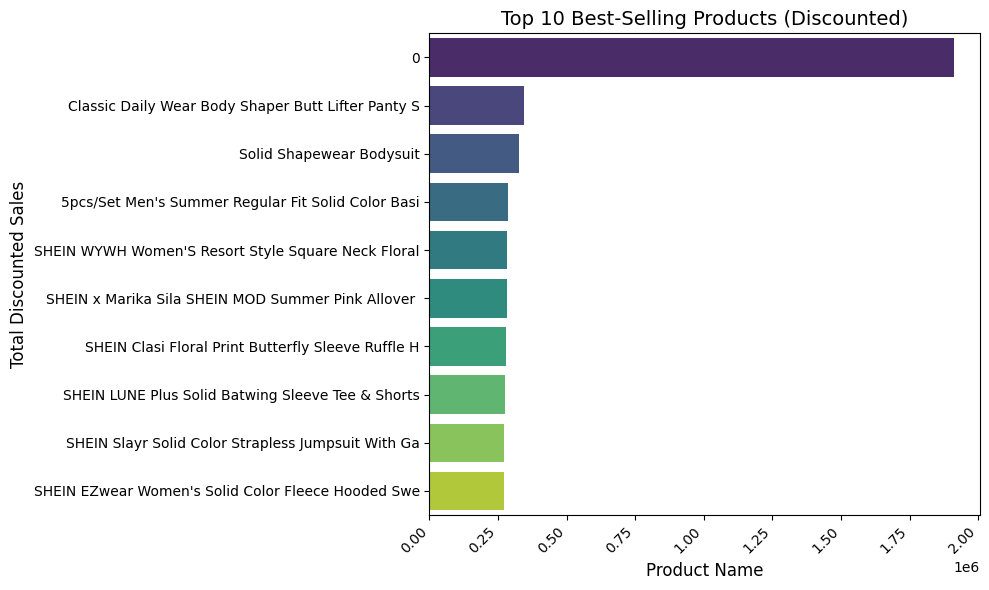

In [41]:
# Create a horizontal bar graph for the top 10 best-selling products
import matplotlib.pyplot as plt
import seaborn as sns

top_10_best_selling["product_name"] = top_10_best_selling["product_name"].apply(
    lambda x: str(x)[:50]
)

plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_10_best_selling,
    y="product_name",
    x="total_sales_discounted",
    palette="viridis",
)

# Add labels and title
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Discounted Sales", fontsize=12)
plt.title("Top 10 Best-Selling Products (Discounted)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

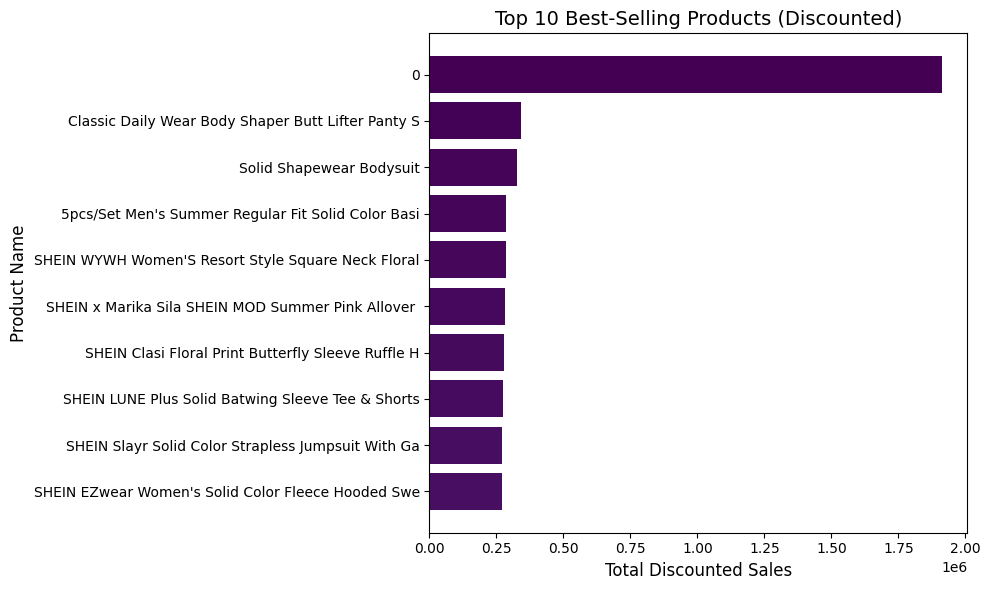

In [42]:
# Plot the horizontal bar graph using pandas
plt.figure(figsize=(10, 6))
plt.barh(
    top_10_best_selling["product_name"],
    top_10_best_selling["total_sales_discounted"],
    color=plt.cm.viridis(range(len(top_10_best_selling))),
)


plt.xlabel("Total Discounted Sales", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.title("Top 10 Best-Selling Products (Discounted)", fontsize=14)

plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Jerico\AppData\Local\Temp\ipykernel_26660\3776214717.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


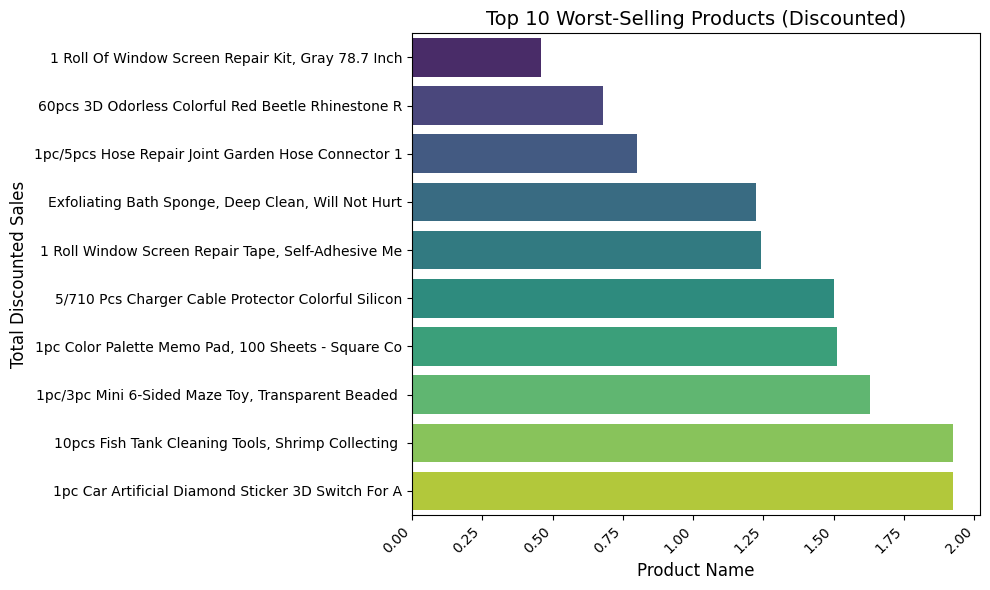

In [43]:
# Create a horizontal bar graph for the top 10 worst-selling products
import matplotlib.pyplot as plt
import seaborn as sns

top_10_worst_selling["product_name"] = top_10_worst_selling["product_name"].apply(
    lambda x: str(x)[:50]
)
plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_10_worst_selling,
    y="product_name",
    x="total_sales_discounted",
    palette="viridis",
)

# Add labels and title
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Discounted Sales", fontsize=12)
plt.title("Top 10 Worst-Selling Products (Discounted)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

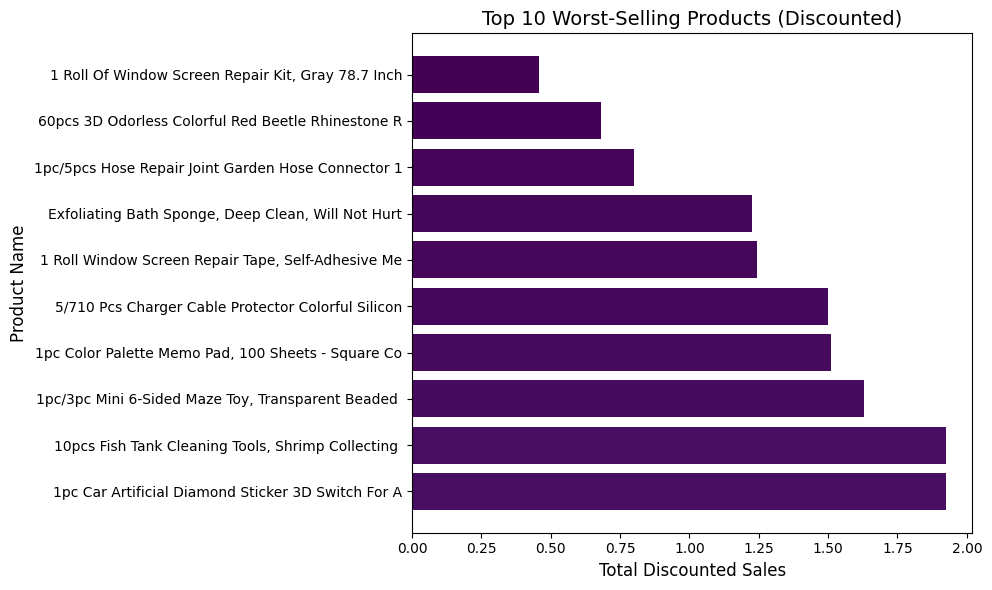

In [44]:
# Plot the horizontal bar graph using pandas
plt.figure(figsize=(10, 6))
plt.barh(
    top_10_worst_selling["product_name"],
    top_10_worst_selling["total_sales_discounted"],
    color=plt.cm.viridis(range(len(top_10_worst_selling))),
)


plt.xlabel("Total Discounted Sales", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.title("Top 10 Worst-Selling Products (Discounted)", fontsize=14)

plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


#### Getting the top discounted product

In [45]:
# Calculate the discount amount
after_cleaning["discount_amount"] = (
    after_cleaning["price"] - after_cleaning["discounted_price"]
)

In [46]:
aggregated_discount = after_cleaning.groupby("product_name", as_index=False)[
    "discount_amount"
].sum()

top_10_discounted_products = aggregated_discount.nlargest(10, "discount_amount")

# Display the top 10 discounted products
print(top_10_discounted_products)

                                            product_name  discount_amount
0                                                      0         754.7464
44339   Nestfair Wooden Loft Bed with Wardrobes and Desk         596.0000
26727  6.5QT Electric Stand Mixer, 3-IN-1 Tilt Head K...         489.5592
27547  7 Speed, Steel Frame, Multiple Colors 26 Inch ...         440.5800
28853  Aoxun 12'x16' Hardtop Gazebo, Aluminum Frame P...         414.0000
36999  Furmax Modern U-Shape Sectional Sofa, Chenille...         386.0303
28504  ALAULM 7 Piece Outdoor Patio Furniture Sets, O...         371.1936
23903  4-Ply 18oz Waterproof RV Awning Fabric Replace...         366.4404
28505  ALAULM Patio Furniture Sets 6 Pieces Patio Sec...         335.9940
45905  Pedicure Chair With Stool Massage Foot Bath Hy...         328.5884


C:\Users\Jerico\AppData\Local\Temp\ipykernel_26660\4065428473.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


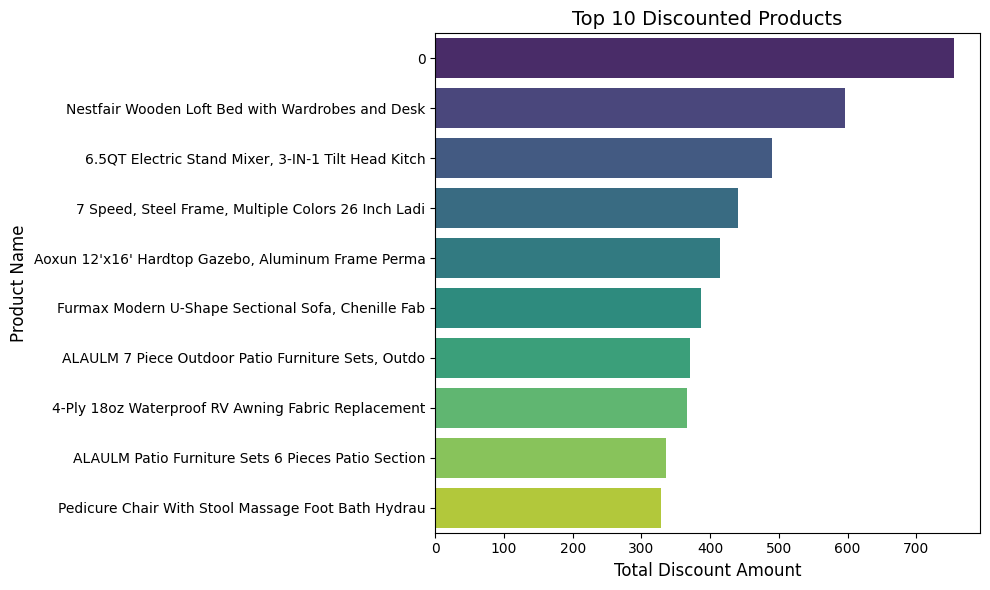

                                            product_name  discount_amount
0                                                      0         754.7464
44339   Nestfair Wooden Loft Bed with Wardrobes and Desk         596.0000
26727  6.5QT Electric Stand Mixer, 3-IN-1 Tilt Head K...         489.5592
27547  7 Speed, Steel Frame, Multiple Colors 26 Inch ...         440.5800
28853  Aoxun 12'x16' Hardtop Gazebo, Aluminum Frame P...         414.0000
36999  Furmax Modern U-Shape Sectional Sofa, Chenille...         386.0303
28504  ALAULM 7 Piece Outdoor Patio Furniture Sets, O...         371.1936
23903  4-Ply 18oz Waterproof RV Awning Fabric Replace...         366.4404
28505  ALAULM Patio Furniture Sets 6 Pieces Patio Sec...         335.9940
45905  Pedicure Chair With Stool Massage Foot Bath Hy...         328.5884


In [47]:
# Create a horizontal bar graph for the top 10 discounted products
import matplotlib.pyplot as plt
import seaborn as sns

top_10_discounted_products["product_name"] = top_10_discounted_products[
    "product_name"
].apply(lambda x: str(x)[:50])

# Plot the top 10 discounted products as a horizontal bar plot
plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_10_discounted_products,
    y="product_name",
    x="discount_amount",
    palette="viridis",
)

plt.ylabel("Product Name", fontsize=12)
plt.xlabel("Total Discount Amount", fontsize=12)
plt.title("Top 10 Discounted Products", fontsize=14)
plt.tight_layout()

plt.show()

print(top_10_discounted_products)

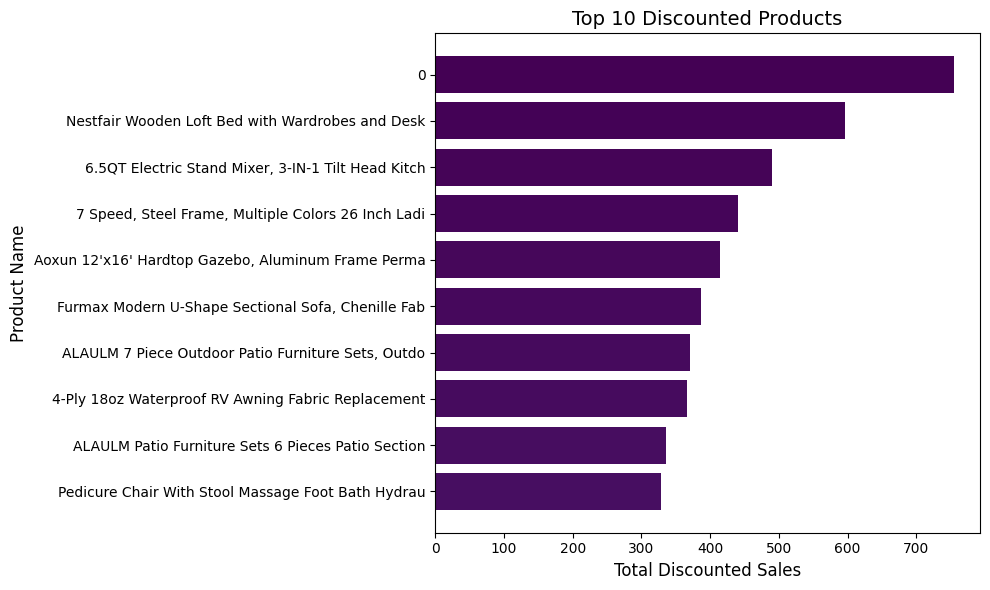

In [48]:
# Plot the horizontal bar graph using pandas
plt.figure(figsize=(10, 6))
plt.barh(
    top_10_discounted_products["product_name"],
    top_10_discounted_products["discount_amount"],
    color=plt.cm.viridis(range(len(top_10_discounted_products))),
)


plt.xlabel("Total Discounted Sales", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.title("Top 10 Discounted Products", fontsize=14)

plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


### Export the after_cleaning dataframe to a csv file



In [49]:
after_cleaning.to_csv("./exports/after_cleaning.csv", index=False)